<h1 style="font-size:40px;"><center>Exercise III:<br> Convolutional and Recurrent Neural Networks
</center></h1>

## Short summary
In this exercise you will: 

* Train CNNs for a binary classification problem
* Visualize how CNNs interprets the data
* Train CNNs for two 3-class classification problem
* Train a RNN on a time series prediction problem
* Visualize RNN hidden node activities

In this lab we will look at network architectures that are designed to handle specific kinds of data. Convolutional Neural Networks for image processing and Recurrent Neural Networks for time series processing

**Deadline for submitting the report: See Canvas assignment.**

## The data
Digits "5" and "6" from the MNIST database used for a binary classification problem.

A dataset consisting of circles, rectangles or triangles, that can be read using the *loadImagesCRT* function.

A dataset consisting of three different types of rectangles, squares, "horizontal" rectangles and "vertical" rectangles. This data can be read using the *loadImagesR3* function.

A dataset consisting of pairs of times series. The input time series is a train of rectangle pulses, and the output is triangles, i.e. an up-ramp followed by a down-ramp. For more details see the cell *Ex4-1*. The task is to train a recurrent network that predicts the triangle time series from the pulse time series.


## The exercises
As for the previous labs all exercises are found below.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | Data | Needed | Loading images for the CNN exercise |
| 3 | PlotImg | Information  | View some of the images |
| 4 | Stats | Needed | Compute classification results |
| 5 | Visualization | Needed | Visualize layers of a CNN |
| 6 | Ex1 | Exercise | For question 1-2 |
| 7 | Ex2 | Exercise | For question 3 |
| 8 | Ex3 | Exercise | For question 4-5 |
| 9 | Ex4-1 | Exercise | For question 6-9 |
| 10 | Ex4-2 | Exercise | For question 6-9 |
| 11 | Ex4-3 | Exercise | For question 6-9 |


In order for you to start with the exercise you need to run all cells with the CellType "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun again!




### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries
In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".


In [1]:
import numpy as np
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda, concatenate
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, RNN

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras import backend as K

from sklearn.metrics import *

import matplotlib
import matplotlib.pyplot as plt

### CellName: Data (#2)
### CellType: Needed
### Cell instruction: Function for getting images for the CNN exercises

This cell defines the functions that obtain the images needed for the CNN exercise. **Note**: Make sure the "crt-trn/" and "crt-tst/" folders are available in the same directory as this notebook file when you actually call these functions. Otherwise, the files files are not found.

Run the cell by entering into the cell and press "CTRL Enter".

In [2]:
def load_pics(folder,N):
    import imageio
    imgs = []
    for i in range(N):
        img = imageio.imread(folder+"img_{:05}.png".format(i+1))
        ch = img[:,:,0]
        imgs.append(ch)
    return np.array(imgs)

def load_labels(fn):
    return np.loadtxt(fn, usecols=(0,1,2))

def loadImagesCRT():
    base = "./"
    trainpic = load_pics(base + "crt-trn/", 500)
    valpic = load_pics(base + "crt-val/", 1000)
    ntrain, width, height = trainpic.shape

    xtrain = (trainpic/np.float32(255)).reshape(500, width, height, 1)
    xval = (valpic/np.float32(255)).reshape(1000, width, height, 1)

    ytrain = load_labels(base+"crt-trn_trg.csv")
    #ytrain = ytrain[:N]
    yval = load_labels(base+"crt-val_trg.csv")
    
    return xtrain, ytrain, xval, yval, width, height

def loadImagesR3():
    base = "./"
    trainpic = load_pics(base + "r3-trn/", 500)
    valpic = load_pics(base + "r3-val/", 1000)
    ntrain, width, height = trainpic.shape

    xtrain = (trainpic/np.float32(255)).reshape(500, width, height, 1)
    xval = (valpic/np.float32(255)).reshape(1000, width, height, 1)

    ytrain = load_labels(base+"r3-trn_trg.csv")
    #ytrain = ytrain[:500]
    yval = load_labels(base+"r3-val_trg.csv")

    return xtrain, ytrain, xval, yval, width, height


def loadMNIST56():
    xtrain, ytrain, xval, yval = np.load("mnist56.npy", allow_pickle=True)
    width, height = xtrain.shape[1:3]
    return xtrain, ytrain, xval, yval, width, height


### CellName: PlotImg (#3)
### CellType: Information
### Cell instruction: Show some of the images

Here we look at the first ten pictures in the training set, and their respective targets. You can select the dataset to look at by uncomment the correct line.

Run the cell by entering into the cell and press "CTRL Enter".

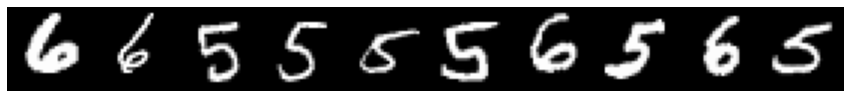

Targets:
[1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]


In [3]:
xTrn, dTrn, xVal, dVal, width, height = loadMNIST56()
#xTrn, dTrn, xVal, dVal, width, height = loadImagesCRT()
#xTrn, dTrn, xVal, dVal, width, height = loadImagesR3()

rndSel = np.random.randint(500, size=10)
plt.figure(1, figsize=(15,10))
plt.imshow(xTrn[rndSel,:,:].swapaxes(0,1).reshape(width,10*height),cmap="gray")
plt.axis("off")
plt.show()

print("Targets:")
print(dTrn[rndSel])


### CellName: Stats (#4)
### CellType: Needed
### Cell instruction: Get binary and 3-class classification results

This cell just defines functions that we can call to compute som performance measures for binary and 3-class classification problems.

Run the cell by entering into the cell and press "CTRL Enter".

In [4]:
def binary_pred_stats(ytrue, ypred, threshold=0.5):
    one_correct = np.sum((ytrue==1)*(ypred > threshold))
    zero_correct = np.sum((ytrue==0)*(ypred <= threshold))
    sensitivity = one_correct / np.sum(ytrue==1)
    specificity = zero_correct / np.sum(ytrue==0)
    accuracy = (one_correct + zero_correct) / len(ytrue)
    return sensitivity, specificity, accuracy

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def multi_stat_3(model = None, x_test = None, y_test = None, lbl = None):
    y_pred = model.predict(x_test, verbose=0 )
    print(lbl,' log_loss:  ', log_loss(y_test, y_pred, eps=1e-15))

    y_true = y_test.argmax(axis=1)
    y_pred = y_pred.argmax(axis=1)
    print(lbl, ' accuracy:  ',(y_pred==y_true).mean(), '\n')

    target_names = ['class {}'.format(i+1) for i in range(3)]

    confuTst = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = target_names,
                          title        = "Confusion Matrix: " + lbl)


### CellName: Visualization (#5)
### CellType: Needed
### Cell instruction: Function that can visualize the different layers of a CNN

This cell is feeding an image through a CNN and stores the intemediate values. It plots the different layers (filtered images) either before or after maxpooling.

Run the cell by entering into the cell and press "CTRL Enter".

In [5]:
def layerVisaliztion(model,
                     indata,
                     target,
                     idx=10,
                     post_pool = False):

    # The prediction for the test case
    #idx_pred = model.predict(indata)[idx,0]
    #print('True label: = {:0.1f}, Prediction = {:0.8f}'.format(idx_pred, target[idx]))
    
    print('Prediction: ', model.predict(indata)[idx])
    print('Target    : ', target[idx])
    
    kind = MaxPooling2D if post_pool else Conv2D
    outs = [l.output for l in model.layers if isinstance(l, kind)]
    intermediate = K.function([model.layers[0].input], outs)
    
    states = [indata[idx:idx+1]] + intermediate([indata[idx:idx+1]])
    plt.figure(figsize=(18,12))                    
    for k,s in enumerate(states):
        plt.figure(figsize=(18,12))
        plt.subplot(len(outs)+1,1,k+1)
        pics = s[0]
        pics = np.rollaxis(pics,2,0)
        rows = 2 if pics.shape[0] > 8 else 1
        cols = pics.shape[0]//rows
        pad = pics.shape[0]-rows*cols
        if pad > 0:
            padding = np.zeros_like(pics, shape=(rows-pad,)+pics.shape[1:])
            pics = np.concatenate([pics, padding])
            cols = cols + 1            
        imgshape = pics.shape[1:]
        pics = pics.reshape((rows,cols)+imgshape)
        pics = pics.swapaxes(1,2)
        pics = pics.reshape((pics.shape[0]*pics.shape[1], pics.shape[2]*pics.shape[3]))
        extent = (0,cols*imgshape[0], 0,rows*imgshape[1])
        plt.imshow(pics,cmap='gray',extent=extent)
        for r in range(1,rows):
            plt.plot([0,cols*imgshape[0]], [r*imgshape[1], r*imgshape[1]], color='r', linestyle='-', linewidth=1)
        for c in range(1,cols):
            plt.plot([c*imgshape[0], c*imgshape[0]], [0,rows*imgshape[1]], color='r', linestyle='-', linewidth=1)


### CellName: Ex1 (#6)
### CellType: Exercise
### Cell instruction: Instructions for question 1-2

## CNN for image classification

In this first exercise you are going to train a CNN that can separate between numbers "5" and "6" from the mnist dataset (mnist56 dataset). We are going to use 2000 training images and 1850 validation images. To start with we have a proposed CNN that can solve this problem. It consists of the following:
* First convolutional layer consisting of 4 kernels of size 3x3, with ReLU activation
* Maxpooling of size 2x2
* Second convolutional layer of 4 kernels of size 3x3, with ReLU activation
* Maxpooling of size 2x2
* Special layer *Flatten()*, just transforms the all of the max pooled filter outputs to a linear vector of outputs
* *Dense* layer, meaning a fully connected MLP layer, to 10 hidden nodes, again ReLU activation
* Final output layer consisting of one single output node with sigmoid activation function because we have a binary classification problem.

The default is to use *stride* = 1 and no *padding*. 

#### Question 1
Make sure you understand the definition of the CNN model in the cell below and train it. **What is your validation set performance in terms of the accuracy?**

#### Question 2
This image classification problem should be relatively easy since a "5" has some distinct differences from a "6". Experiment with the architecture of the CNN model and try to make it smaller (in terms of the number of trainable parameters), but with the same almost perfect validation accuracy (>98%). **How many parameters do you have in your trimmed model? What is your architecture?**

**Hint:** There is of course very many ways you can make a smaller architecture. You do not need to test all of them!


In [10]:
def run1_2(*args):
    """ 
    Run ex1-2 with variable amount of hyperparameters as args. args used for easier hyperparameter adjustment. 
    """
    
    # Unpack args
    a, b, c, d, e, f, *_ = args
    
    # Load the dataset, MNIST-56
    x_trn, d_trn, x_val, d_val, width, height = loadMNIST56()
    
    # The size of the images
    input_shape = (width, height, 1)
    
    # Define the CNN ex1
    ex1 = Sequential()
    
    # First conv layer
    ex1.add(Conv2D(a, kernel_size=(b, b), activation='relu', input_shape=input_shape))
    ex1.add(MaxPooling2D(pool_size=(c, c)))
    
    # Second conv layer
    ex1.add(Conv2D(d, kernel_size=(e, e), activation='relu'))
    ex1.add(MaxPooling2D(pool_size=(f, f)))
    
    # Fully connected MLP layers
    ex1.add(Flatten())
    ex1.add(Dense(10, activation='relu'))
    
    # Output layer
    ex1.add(Dense(1, activation='sigmoid'))
    
    # We use cross entropy error and the adam optimizer
    adam = Adam(learning_rate=0.005)
    ex1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    ex1.summary()
    
    # Now train the ex1
    estimator_ex1 = ex1.fit(x_trn, d_trn, 
                            validation_data=(x_val, d_val),
                            epochs=30, 
                            batch_size=64,
                            verbose=0)
    
    
    # Training history
    plt.figure()
    plt.ylabel('Loss / Accuracy')
    plt.xlabel('Epoch')
    for k in estimator_ex1.history.keys():
        plt.plot(estimator_ex1.history[k], label = k) 
    plt.legend(loc='best')
    plt.show()
    
    # Get the training predictions and results for those
    d_trn_pred = ex1.predict(x_trn)[:,0]
    sens, spec, acc = binary_pred_stats(d_trn, d_trn_pred)
    print('training: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')
    
    # Get the validation predictions and the results for those
    d_val_pred = ex1.predict(x_val)[:,0]
    sens, spec, acc = binary_pred_stats(d_val, d_val_pred)
    print('validation: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')
    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 4)         20        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 3)         51        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 3)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 27)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                280       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

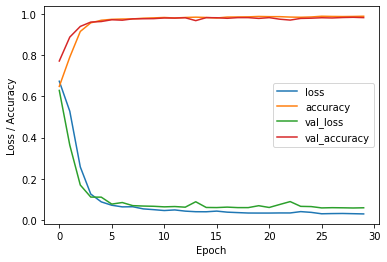

training: Accuracy = 0.9925, Sensitivity = 0.9950, Specificity = 0.9900 

validation: Accuracy = 0.9832, Sensitivity = 0.9854, Specificity = 0.9809 



In [12]:
run1_2(4, 2, 2, 3, 2, 4)

In [ ]:
1)
run1_2(4, 3, 2, 4, 3, 2)
Total params: 1,209

training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
validation: Accuracy = 0.9941, Sensitivity = 0.9916, Specificity = 0.9966 

training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
validation: Accuracy = 0.9935, Sensitivity = 0.9916, Specificity = 0.9955 

2)
run1_2(6, 2, 3, 3, 2, 3)
Total params: 246
training: Accuracy = 0.9885, Sensitivity = 0.9990, Specificity = 0.9780 
validation: Accuracy = 0.9849, Sensitivity = 0.9937, Specificity = 0.9753 
# Unreliable performance

run1_2(4, 2, 2, 3, 2, 4)
Total params: 362
training: Accuracy = 0.9915, Sensitivity = 0.9990, Specificity = 0.9840 
validation: Accuracy = 0.9870, Sensitivity = 0.9906, Specificity = 0.9832 
# Averaged over 3 runs (decently reliable, I'd use this)

run1_2(4, 3, 2, 3, 2, 2)
Total params: 592
training: Accuracy = 0.9975, Sensitivity = 0.9990, Specificity = 0.9960 
validation: Accuracy = 0.9903, Sensitivity = 0.9906, Specificity = 0.9899 
# Very reliable above 98%

### CellName: Ex2 (#7)
### CellType: Exercise
### Cell instruction: Instructions for question 3

You are now going to take a look into the CNN model. There are many attempts to visualize how the CNN model is making classifications. We will here just look at the different layer outputs given an input image. The function 'layerVisualization', found in cell #5 does the following:
* Use one selected image from the supplied dataset.
* Make a forward pass through the CNN remembering all intermediate values.
* Plot all of the "filters" for each of the layers.
* One can select to plot before or after the MaxPooling.

You pass the model that you want to visualize to the 'layerVisualization' function. If you do not change the names in cell (Ex1) it will be 'ex1'.

#### Question 3
Train a CNN for the "5" vs "6" problem! As a suggestion use the following CNN

*3x(3x3 kernel)-maxpool-3x(3x3 kernel)-maxpool-(Flatten)-Dense(5)-Dense(1)*

Make sure that your trained model gives good validation results (i.e. > 95% accuracy). Having such a model, you can run the cell below. There are two parameters you need to specify, *idx* and *post_pool*. The *post_pool* variable can be set to *True* meaning that filters will be shown after MaxPooling. The image to show is selected by the *idx* variable. As an example, the following values represent,
* idx=1 number "6"
* idx=2 number "5"
* idx=3 another number "6"
* idx=5 antoher number "5"

**Can you find and describe some property in the filters that makes sense when it comes to separating "5" from "6"?**

Hint! If you repeat the training you most likely get a new network and other filters!


In [27]:
def run3(*args):
    """ 
    Run ex3 with variable amount of hyperparameters as args. args used for easier hyperparameter adjustment. 
    """
    
    # Unpack args
    a, b, c, d, e, f, idx, post_pool, *_ = args
    
    # Load the dataset, MNIST-56
    x_trn, d_trn, x_val, d_val, width, height = loadMNIST56()
    
    # The size of the images
    input_shape = (width, height, 1)
    
    # Define the CNN ex1
    ex1 = Sequential()
    
    # Call the visualization method, giving the model and the validation data to select the case from
    
    # First conv layer
    ex1.add(Conv2D(a, kernel_size=(b, b), activation='relu', input_shape=input_shape))
    #wei = ex1.layers[0].get_weights()[0]
    #print(wei) if post_pool else None
    #layerVisaliztion(ex1, x_val, d_val, idx, post_pool) if not post_pool else None
    ex1.add(MaxPooling2D(pool_size=(c, c)))
    
    #layerVisaliztion(ex1, x_val, d_val, idx, post_pool) if post_pool else None
    #wei = ex1.layers[0].get_weights()[0] if post_pool else None
    #print(wei) if post_pool else None
    
    # Second conv layer
    #ex1.add(Conv2D(d, kernel_size=(e, e), activation='relu'))
    #ex1.add(MaxPooling2D(pool_size=(f, f)))
    
    # Fully connected MLP layers
    ex1.add(Flatten())
    ex1.add(Dense(5, activation='relu'))
    
    # Output layer
    ex1.add(Dense(1, activation='sigmoid'))
    
    # We use cross entropy error and the adam optimizer
    adam = Adam(learning_rate=0.005)
    ex1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    ex1.summary()
    
    # Now train the ex1
    estimator_ex1 = ex1.fit(x_trn, d_trn, 
                            validation_data=(x_val, d_val),
                            epochs=30, 
                            batch_size=64,
                            verbose=0)
    

    # Get the validation predictions and the results for those
    d_val_pred = ex1.predict(x_val)[:,0]
    sens, spec, acc = binary_pred_stats(d_val, d_val_pred)
    print('validation: Accuracy = {:.4f}, Sensitivity = {:.4f}, Specificity = {:.4f}'.format(acc, sens, spec), '\n')
    
    return ex1, x_val, d_val
    


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 3)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 192)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 965       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________
validation: Accuracy = 0.9908, Sensitivity = 0.9906, Specificity = 0.9910 

Prediction:  [0.05832812]
Target    :  0.

<Figure size 1296x864 with 0 Axes>

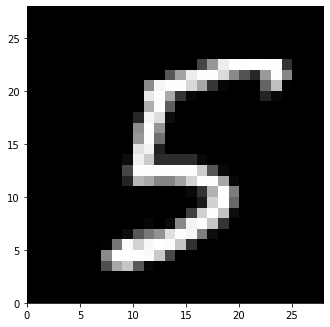

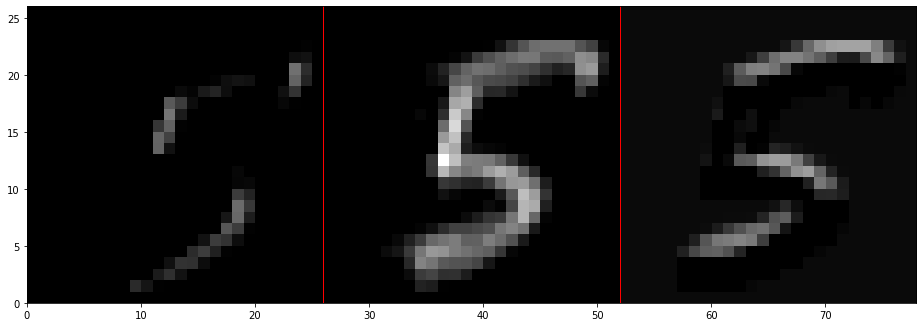

In [28]:
# Show before or after MaxPooling
post_pool = False

# The test image to look at
idx = 5

# Run func
ex1, x_val, d_val = run3(3, 3, 3, 3, 3, 3, 1, True)

# Call the visualization method, giving the model and the validation data to select the case from
layerVisaliztion(ex1, x_val, d_val, idx, post_pool)

In [ ]:
3) 

One of the filters seems to be detecting the edges of the digits, possibly a laplacian filter or similar. 
This can be useful both for comparing the surface area of the digits and to compare the number of pixels
that are on vertical and horizontal lines. Given the nature of the digits "5" and "6" there could be some
variations due to the digits being handwritten, but in general 5 should for example have more pixels along 
a straight lines.


### CellName: Ex3 (#8)
### CellType: Exercise
### Cell instruction: Instructions for question 4-5

## CNN for image classification

In this exercise you are going to train a CNN that can separate between circles/squares/triangles found in the CRT dataset, and the three different types of rectangles found in the R3 dataset. You will use 500 training images and 1000 validation images. Code is provided for loading the data, training the model and presenting the result. Your task is to define the actual CNN model and see how it performs. For the following two questions you can optimize the model based on the validation performance. Here we assume that 1000 validation images are many enough for "model selection overtraining bias" to be small.

#### Question 4
Define your own CNN model for classifying the images in the CRT data into three classes. **Provide the details of your CNN model and present the validation result.**

**Hint:** Remember the difference between a binary classifier and a multi-class classifier!


#### Question 5
Define your own CNN model for classifying the images in the R3 data into three classes. **Provide the details of your CNN model and present the validation result.** **Why is this a more difficult problem than Question 4?**


#### Bonus task 
The bonus tasks are provided if you have extra time and want to continue to explore the CNNs. **These tasks are not required for the course and does not influence any grading**. 

You can use the *layerVisualization* method also for above models (Q4 and Q5). It will show you the different filter outputs. Again try to understand the features the different filter learn to separate between circles-triangles-rectangles, or the rectangles for the R3 data set.

/var/folders/fm/n7phjpnx6gn8b2s7dzxhblpm0000gn/T/ipykernel_73066/3241759781.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(folder+"img_{:05}.png".format(i+1))


Training data input shape:  (500, 64, 64, 1)
Training data output shape:  (500, 3)
Validation data input shape:  (1000, 64, 64, 1)
Validation data output shape:  (1000, 3)
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 61, 61, 50)        850       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 30, 30, 50)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 28, 28, 30)        13530     
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 27, 27, 10)        1210      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_50 (F

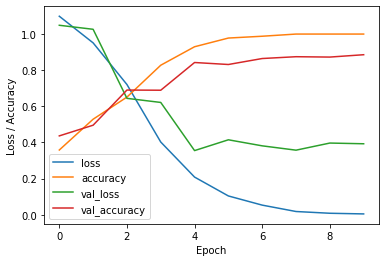

Training  log_loss:   0.004146312576861036
Training  accuracy:   1.0 



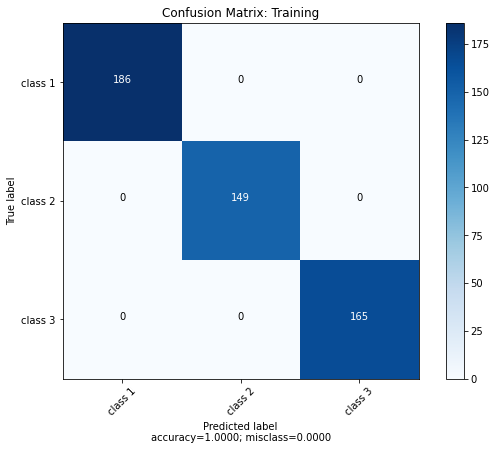

Validation  log_loss:   0.39250908238457155
Validation  accuracy:   0.884 



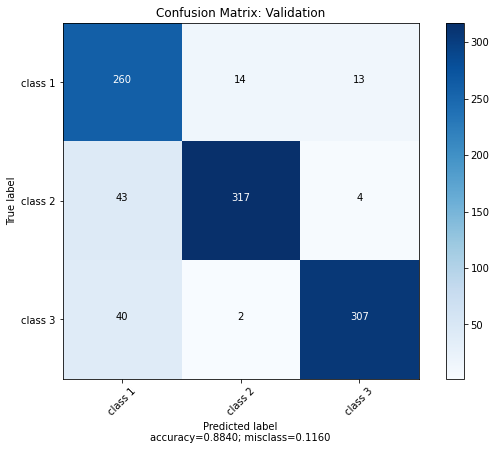

In [142]:
def categorical_crossentropy(y_ans, y_pred):
    return keras.losses.categorical_crossentropy(y_ans, y_pred)

def mean_squared_error(y_ans, y_pred):
    return keras.losses.mean_squared_error(y_ans, y_pred)

# Load the CRT dataset (Question 4)
#x_trn, d_trn, x_val, d_val, width, height = loadImagesCRT()
# Load the R3 dataset (Question 5)
x_trn, d_trn, x_val, d_val, width, height = loadImagesR3()

print('Training data input shape: ', x_trn.shape)
print('Training data output shape: ', d_trn.shape)
print('Validation data input shape: ', x_val.shape)
print('Validation data output shape: ', d_val.shape)

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex3
ex3 = Sequential()

#
# YOUR CODE HERE
#
# First conv layer
ex3.add(Conv2D(50, kernel_size=(4, 4), activation='relu', input_shape=input_shape))
ex3.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer
ex3.add(Conv2D(30, kernel_size=(3, 3), activation='relu'))

# Thrid conv layer
ex3.add(Conv2D(10, kernel_size=(2, 2), activation='relu'))
ex3.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected MLP layers
ex3.add(Flatten())
ex3.add(Dense(9, activation='relu'))

# Output layer
ex3.add(Dense(3, activation='softmax'))
#
# YOUR CODE HERE
#

# We use cross entropy error and the adam optimizer
adam = Adam(learning_rate=0.005)
ex3.compile(loss=[categorical_crossentropy, mean_squared_error], optimizer=adam, metrics=['accuracy'])  # Combined loss functions
ex3.summary()

# Now train the ex3
estimator_ex3 = ex3.fit(x_trn, d_trn, 
                      validation_data=(x_val, d_val),
                      epochs=10, 
                      batch_size=21,
                      verbose=0)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex3.history.keys():
    plt.plot(estimator_ex3.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Training result
multi_stat_3(ex3, x_trn, d_trn, 'Training')

# Validation result
multi_stat_3(ex3, x_val, d_val, 'Validation')

Prediction:  [4.1513869e-01 5.8473814e-01 1.2319114e-04]
Target    :  [0. 1. 0.]


<Figure size 1296x864 with 0 Axes>

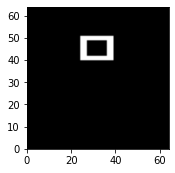

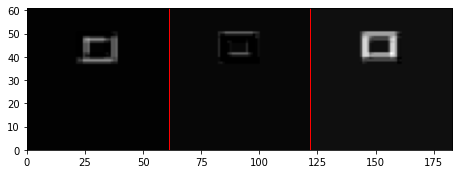

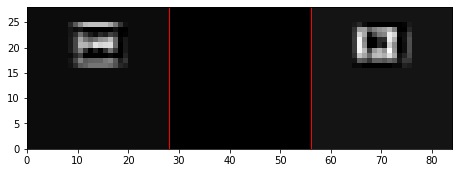

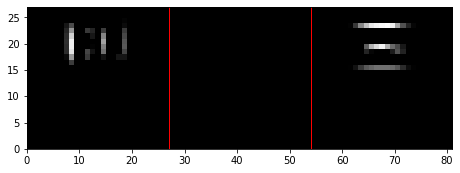

In [52]:
# Show before or after MaxPooling
post_pool = False

# The test image to look at
idx = 6

# Call the visualization method, giving the model and the test data to select the case from
layerVisaliztion(ex3, x_val, d_val, idx, post_pool)

In [ ]:
4) 

*3x(4x4 kernel)-maxpool-3x(3x3 kernel)-3x(2x2 kernel)-maxpool-(Flatten)-Dense(9)-Dense(3)*


5) 

Validation  log_loss:   1.7895587767034835
Validation  accuracy:   0.691 

Validation  log_loss:   2.1127321241816275
Validation  accuracy:   0.659

Validation  log_loss:   1.4601435912683975
Validation  accuracy:   0.756 

triangles & circles & rectangles vs different kinds of rectangles 
It's more difficult than Q4 since the features found are more similar and less distinct for the different classes.
It's thus harder to find appropriate filters that seperates the classes. For example counting the edge pixels along vertical lines 
could be useful when distinguishing between circles and rectangles, but if the comparison is between two types of rectangles this feature
is likely less useful since both classes has pixels along vertical edges. 

### CellName: Ex4-1 (#9)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
We will now look at recurrent networks! **Note**: This exercise is divided into three cells. The actual questions for this part can be found in cell *Ex4-3* below.

### Loading and visualizing the data
The cell below loads the training data and the validation data from existing binary python files and plots one set of training/validation data, both the input sequence and the target sequence. Run the cell by entering into the cell and press "CTRL Enter".

How is data generated? The input sequence consists of square pulses with varying length and height. The waiting time between the pulses is also varying within some predefined ranges. The lower limit is 2 times the length of the previous pulse. The target triangle pulse sequence is built from the input sequence as follows:
* the triangle pulse starts when the input square pulse have ended.
* the width of the triangle (at the base) is twice the width of the square pulse.
* the height of the triangle is the same as the height of the square pulse.

The task is now to learn this mapping using a recurrent neural network. There are 500 input/target sequences in the training data and 500 in the validation data.


Training data input shape:  (500, 100)
Training data output shape:  (500, 100)
Validation data input shape:  (500, 100)
Validation data output shape:  (500, 100)


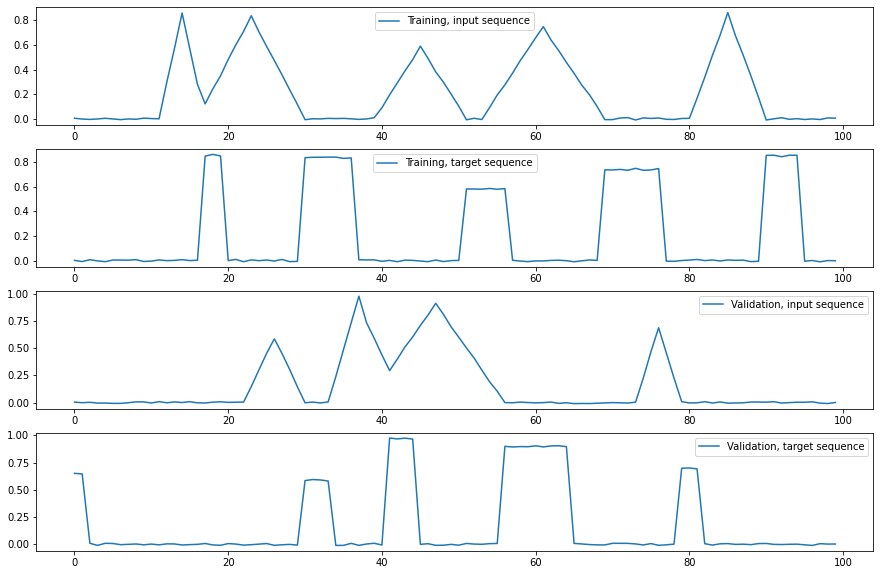

In [121]:
# Load data from files
x_trn,d_trn= np.load("pulsedata1-trn.npy")
x_val,d_val = np.load("pulsedata1-val.npy")


print('Training data input shape: ', x_trn.shape)
print('Training data output shape: ', d_trn.shape)
print('Validation data input shape: ', x_val.shape)
print('Validation data output shape: ', d_val.shape)

# If this is set to True, then we have the reverse problem. Input triangle pulse, target square puls.
if True:
    d_trn,x_trn = x_trn[:,::-1],d_trn[:,::-1]
    d_val,x_val = x_val[:,::-1],d_val[:,::-1]

ns,tlen = x_trn.shape
t = np.arange(tlen)

# The training / test case to look at
i = 3

# Plot
plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
plt.plot(t,x_trn[i,:])
plt.legend(['Training, input sequence'], loc=0)

plt.subplot(4,1,2)
plt.plot(t,d_trn[i,:])
plt.legend(['Training, target sequence'], loc=0)

plt.subplot(4,1,3)
plt.plot(t,x_val[i,:])
plt.legend(['Validation, input sequence'], loc=0)

plt.subplot(4,1,4)
plt.plot(t,d_val[i,:])
plt.legend(['Validation, target sequence'], loc=0)


### CellName: Ex4-2 (#10)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
### Define the model and train
Here we are going to setup the model and train it. There are three different models to choose from: 
* SimpleRNN: Simple feedback weights where the output from a node is feeding back to itself. For several hidden nodes there are feedback weights to all other nodes in the layer.
* LSTM: The LSTM unit
* GRU: The GRU unit

The standard choice of activation function is *tanh*, but you can also test *relu*. When it comes to training this model we are going to use a possible truncated BPTT approach. The support in Keras for doing this is somewhat limited so here it is implemented manually. In short we have 500 training sequences and we define a mini-batch size *mb* that selects *mb* of these sequences to train using the normal stochastic gradient descent idea. Then we have a variable *batchlen* that is the length of the sequence to use in truncated BPTT. The default values for these are *mb=20* and *batchlen=50*. If you want to train without the truncated BPTT approach put *batchlen=100*.

During training we print the normalized training and validation error. Normalized means here that the loss (=MSE) is divided by the variance of the target signal. That means that a normalized error of 1 is poor, but below 0.1 (or so) the error is much smaller than the signal itself.

What you need to do in this cell is to define your model and train it.

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_18 (GRU)                 (20, 50, 200)             121800    
_________________________________________________________________
time_distributed_30 (TimeDis (20, 50, 1)               201       
Total params: 122,001
Trainable params: 122,001
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     9.91        0.69220     0.53534
2     4.90        0.43334     0.27484
3     6.61        0.25471     0.20374
4     5.72        0.21669     0.19313
5     6.59        0.18209     0.15410
6     5.26        0.15088     0.12664
7     6.83        0.12801     0.10390
8     4.44        0.10778     0.10779
9     6.33        0.11540     0.10116
10     4.29        0.10299     0.07916
11     4.29        0.08477     0.07541
12     4.26        0.08813     0.06815
13     4.57 

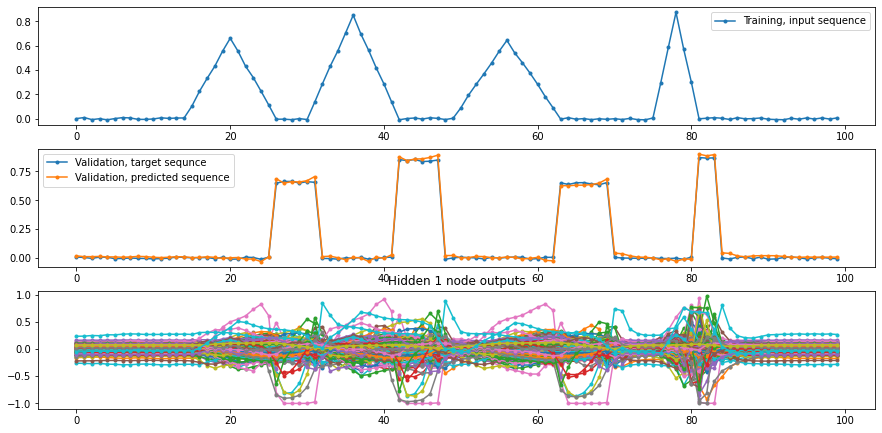

In [119]:
%%time
ns,tlen = x_trn.shape

# Parameters defining the mini-batch size and 
# the sequence length for truncated BPTT
mb = 20
batchlen = 50

# The network type
#net = SimpleRNN
net = GRU
#net = LSTM

# Number of hidden nodes
nh1 = 200

# This is only if you would like to add an additional hidden layer. See below.
nh2 = 500

# The activation function
activation = 'tanh'
#activation = 'relu'

# The number of epochs
nE = 20

# Start defining the model
nmb = ns//mb
ntsteps = tlen//batchlen

model = Sequential()
model.add(net(nh1, 
              batch_input_shape=(mb,batchlen,1), 
              stateful=True, 
              return_sequences=True, 
              activation=activation))

# Uncomment this line if you want to add an additional hidden layer

model.add(TimeDistributed(Dense(1)))

adam = Adam(learning_rate=0.003)
model.compile(optimizer=adam,loss='mean_squared_error')
model.summary()

# Now the training part
trnTrgVar = np.var(d_trn[:,:])   # Variance for train target signal
valTrgVar = np.var(d_val[:,:])   # Variance for validation target signal
ndone = 0

print('Epoch', 'Time/Epoch', ' Trn-Err', '    Val-Err')
for ne in range(nE):
    t0 = time.time()
    sumlossTrn = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = model.train_on_batch(x_trn[i1:i2,t1:t2,None], d_trn[i1:i2,t1:t2,None])
            sumlossTrn += loss
    meanlossTrn = sumlossTrn/(nmb*ntsteps)

    # Validation error
    sumlossVal = 0
    for batch in range(nmb):
        i1,i2 = batch*mb,(batch+1)*mb
        model.reset_states()
        for tstep in range(ntsteps):
            t1,t2 = tstep*batchlen,(tstep+1)*batchlen
            loss = model.evaluate(x_val[i1:i2,t1:t2,None], d_val[i1:i2,t1:t2,None],batch_size=mb,verbose=0)
            sumlossVal += loss
    meanlossVal = sumlossVal/(nmb*ntsteps)
    t1 = time.time()
    ndone += 1
    print(ndone, "    {:.2f}        {:.5f}     {:.5f}".format(t1-t0, meanlossTrn/trnTrgVar, meanlossVal/valTrgVar))

plot_9()

In [ ]:
6) 2 Hidden layers
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     4.19        0.88950     0.65989
...
20     2.60        0.25415     0.25121
CPU times: user 1min 1s, sys: 7.01 s, total: 1min 8s
Wall time: 58.1 s

# 1 hidden layer
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     3.09        1.63545     1.04886
...
20     3.01        0.23748     0.21834
CPU times: user 1min 8s, sys: 6.48 s, total: 1min 15s

Best runs over a few attempts.

7) 
*GRU 6 nodes *
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     5.20        0.99338     0.77723
...
20     2.98        0.03362     0.03008
CPU times: user 1min 10s, sys: 8.44 s, total: 1min 19s
___
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     7.09        1.03717     0.81127
...
20     4.11        0.03173     0.02960
CPU times: user 1min 19s, sys: 8.43 s, total: 1min 27s

*LSTM 6 nodes*
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     5.69        0.90333     0.62148
...
20     3.41        0.04247     0.04115
CPU times: user 1min 12s, sys: 7.86 s, total: 1min 20s
___
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     10.95        0.78323     0.56562
...
20     3.44        0.03692     0.03436
CPU times: user 1min 18s, sys: 7.99 s, total: 1min 26s

*SimpleRNN 181 weights 12 nodes single layer*
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     4.20        0.72460     0.57034
...
20     2.69        0.10607     0.10919
CPU times: user 1min, sys: 6.6 s, total: 1min 6s

GRU is best!

8)


9)

Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     9.24        0.65087     0.49052
...
20     7.26        0.08298     0.09229
CPU times: user 2min 54s, sys: 16.9 s, total: 3min 11s

Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch Time/Epoch  Trn-Err     Val-Err
1     12.48        0.73264     0.57275
...
20     7.29        0.10551     0.09801
CPU times: user 3min 15s, sys: 18.8 s, total: 3min 34s


### CellName: Ex4-3 (#11)
### CellType: Exercise
### Cell instruction: Instructions for question 6-9

## RNN as a pulse converter
### Plot the result
In this cell we just plot the result for one of the first *mb* (minibatch size) test sequences. You can select which of these ones by an index (see the code). Also, the last graph shows the hidden node activation for all of the hidden nodes. **Note:** For the GRU and simpleRNN models this is all of the hidden activity there is, but for the LSTM there is also the memory signal. That one is not shown!

### Questions
We are now finally at the point of asking questions. Whenever you define a new model and train it, you need to run the  cell below in order to show the result for the newly trained model. 

**Hint!** For all of the questions below you are going to train different models. Keep an eye on how the training error is developing. If you see large fluctuations, you may to change the learning rate. The default value of 0.003 should be OK for most trainings. 

#### Question 6
(Just to get started!) Define a simpleRNN model with 5 hidden nodes and train it for about 20 epochs. **What validation error do you obtain?** 

Hint 1: The validation error can be found during "training" as the error for the last epoch.<br>
Hint 2: You may have to train a couple of times to make sure that you did not end up in a "bad" local minima the first time.

#### Question 7
Test different models! Train the three different models (one hidden layer only) with the approximately the same number of trainable weights (around 150-200) and decide which of them that works best? **So, out of the three different models, *simpleRNN, GRU* and *LSTM*, which one worked best using the same number weights?**

#### Question 8
Interpretation! You are now going to interpret the hidden node outputs. Remember that the actual output for each time is a linear combination of the hidden node outputs. As said before you can see the hidden nodes output in the last plot. Note that the weights in the dense layer can have different signs so that hidden nodes outputs can be linearly combined with both positive and negatives signs. Train a *GRU* model with 3 hidden nodes for about 20 epochs. **Try to explain what the different hidden nodes are detecting**.

Comment: This is of course a question with no definite true answer. We just want you to interpret what the different nodes are doing.

#### Question 9
If you look at the top of cell *Ex4-1* you can, by changing False -> True, define the reverse problem (see top of the code cell). That is, input is the triangle pulse and target is the square pulse. This should be a more difficult problem! **Why?** **Present a RNN model that can "solve" this reverse problem (i.e. below 0.1 in test error).**

Hint: Here you can experiment with two hidden layers of LSTM/GRU/SimpleRNN nodes


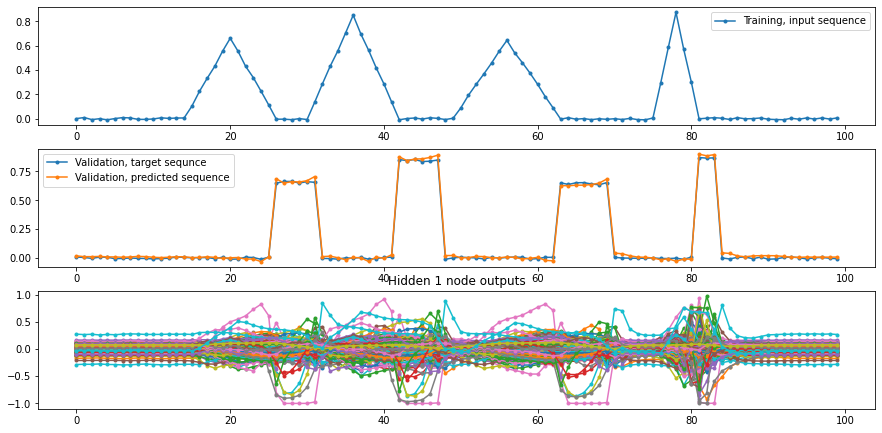

In [122]:
def plot_9():
    xshow = x_val[:mb]
    dshow = d_val[:mb]
    dout = np.zeros((mb,tlen))
    hidden1 = np.zeros((mb,tlen,nh1))
    hidden2 = np.zeros((mb,tlen,nh2))
    
    rnn1 = model.layers[0]
    rnn2= model.layers[1]
    
    #dense = model.layers[-1]
    #sign = K.sign(dense.layer.kernel)[None,None,:,0]
    if len(model.layers) > 2 :
        intermediate = K.function([rnn1.input], [rnn1.output, rnn2.output ])
    else :
        intermediate = K.function([rnn1.input], [rnn1.output])
    
    for tstep in range(ntsteps):
        t1,t2 = tstep*batchlen,(tstep+1)*batchlen
        inp = xshow[:,t1:t2,None]
        if len(model.layers) > 2 :
            hi,hi2 = intermediate([inp])
            hidden2[:,t1:t2:,:] = hi2
        else :
            hi, = intermediate([inp])
        hidden1[:,t1:t2:,:] = hi
        yi = model.predict(xshow[:,t1:t2,None])
        dout[:,t1:t2] = yi[:,:,0]
    
    t = np.arange(tlen)
    
    # Selection of validation sequence, valid range is [0,mb]
    i = mb -1
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,1,1)
    plt.plot(t,xshow[i],'-',marker='.')
    plt.legend(['Training, input sequence'], loc=0)
    
    plt.subplot(4,1,2)
    plt.plot(t,dshow[i],'-',marker='.')
    plt.plot(t,dout[i],'-',marker='.')
    plt.legend(['Validation, target sequnce', 'Validation, predicted sequence'], loc=0)
    
    plt.subplot(4,1,3)
    plt.plot(t,hidden1[i],'-',marker='.')
    plt.title('Hidden 1 node outputs')
    
    if len(model.layers) > 2 :
        plt.subplot(4,1,4)
        plt.plot(t,hidden2[i],'-',marker='.')
        plt.title('Hidden 2 node outputs')
plot_9()

# The report

## Name

Anton Carlsson

## Introduction

In this assignment CNNs (Convolutional Neural Networks) and RNNs (Recurrent Neural Networks) are investigated in order to solve classification and time series prediction problems. CNNs are a suitable approach for tackling the classification problems presented and visualization is utilized in order to obtain a deeper understanding of the problems and how it is that the CNN can tackle it. For the time series prediction problems the RNN approach is more suitable and this case is also examined further utilizing visualization methods and validation metrics. 

The following notation will be used to describe a neural network model:
3x(3x3 kernel)-maxpool-3x(3x3 kernel)-maxpool-(Flatten)-Dense(10)-Dense(1)
Meaning first layer has 3 filters with kernel size 3x3 with maxpooling performed followed by another similar layer also with a maxpooling, then the layer is flattened and 

### Question 1
4x(3x3 kernel)-maxpool-4x(3x3 kernel)-(Flatten)-Dense(10)-Dense(1)
Total params: 1,209

training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
validation: Accuracy = 0.9941, Sensitivity = 0.9916, Specificity = 0.9966 

training: Accuracy = 1.0000, Sensitivity = 1.0000, Specificity = 1.0000 
validation: Accuracy = 0.9935, Sensitivity = 0.9916, Specificity = 0.9955 

From two meassurements. 

### Question 2
6x(2x2 kernel)-maxpool-3x(2x2 kernel)-(Flatten)-Dense(10)-Dense(1)
Total params: 246
training: Accuracy = 0.9885, Sensitivity = 0.9990, Specificity = 0.9780 
validation: Accuracy = 0.9849, Sensitivity = 0.9937, Specificity = 0.9753 
#### Unreliable performance

4x(2x2 kernel)-maxpool-3x(2x2 kernel)-(Flatten)-Dense(10)-Dense(1)
Total params: 362
training: Accuracy = 0.9915, Sensitivity = 0.9990, Specificity = 0.9840 
validation: Accuracy = 0.9870, Sensitivity = 0.9906, Specificity = 0.9832 
#### Averaged over 3 runs (decently reliable, I'd use this)

4x(3x3 kernel)-maxpool-3x(2x2 kernel)-(Flatten)-Dense(10)-Dense(1)
Total params: 592
training: Accuracy = 0.9975, Sensitivity = 0.9990, Specificity = 0.9960 
validation: Accuracy = 0.9903, Sensitivity = 0.9906, Specificity = 0.9899 
#### Very reliable above 98%

(Note that maxpooling might differ for the above cases) 

As can be seen above The most trimmed model with 246 params posed to unreliable to be deemed a solution, although stepping up to 362 params resulted in a pretty reliable solution, which is the recommended one. With the very reliable solution utilizing 592 params a bad score was never seen. 

### Question 3
One of the filters seems to be detecting the edges of the digits, possibly a laplacian filter or similar. This can be useful both for comparing the surface area of the digits and to compare the number of pixels that are on vertical and horizontal lines. Given the nature of the digits "5" and "6" there could be some variations due to the digits being handwritten, but in general 5 should for example have more pixels along a straight lines.

### Question 4
CNN model: 
*4x(3x3 kernel)-maxpool-3x(2x2 kernel)-maxpool-(Flatten)-Dense(9)-Dense(3)*

Training  log_loss:   0.0012008768319462177
Training  accuracy:   1.0 

Validation  log_loss:   0.4206671525617702
Validation  accuracy:   0.914 

The CNN managed to achieve a validation accuracy of over 0.9, altough with a log loss of 0.42. Altough the accuracy was requested, it can here be extra important to monitor the log loss so that the model does not show any clear signs of overfitting. 

### Question 5
*50x(4x4 kernel)-maxpool-30x(3x3 kernel)-10x(2x2 kernel)-maxpool-(Flatten)-Dense(9)-Dense(3)*

Validation  log_loss:   0.39250908238457155  
Validation  accuracy:   0.884 

It's more difficult than Q4 since the features found are more similar and less distinct for the different classes. It's thus harder to find appropriate filters that seperates the classes. For example counting the edge pixels along vertical lines could be useful when distinguishing between circles and rectangles, but if the comparison is between two types of rectangles this feature is likely less useful since both classes has pixels along vertical edges. 

### Question 6
With two hidden layers I got a validation error (Val-Err) of about 0.25 as shown below:
Total params: 41   
Trainable params: 41   
Epoch 20  
Trn-Err  0.25415     
Val-Err  0.25121  
CPU times: user 1min 1s, sys: 7.01 s, total: 1min 8s


With instead one hidden layer I got a validation error (Val-Err) of about 0.22 as shown below:
Total params: 41
Trainable params: 41
Epoch   20  
Trn-Err     0.23748   
Val-Err  0.21834   
CPU times: user 1min 8s, sys: 6.48 s, total: 1min 15s   

These are not averaged runs, but instead the best runs chosen over a few attempts.   


### Question 7
GRU seemed to be the best performing RNN model for the given problem (compared with SimpleRNN and LSTM) consistently achieving a lower validation error than LSTM with the same amount of nodes and SimpleRNN with increased amount of nodes to have roughly similar amount trainable parameters. The results are not surprising since in general, LSTMs are more complex and have more parameters than GRUs, which can make them more difficult to train and the benefits of storing information long term is not really needed for the task. 

### Question 8
I assume that the nodes in general would like to capture properties as width, height and pattern/periodicity of the pulses. Inspecting the plots further one of the cases shows that a single node managed to capture the appearance of the pulses quite well. Everything from the pointy tops characterised by the triangles, to the previously mentioned pulse attributes. The second node seemed to smoothen out the edges a bit more and make the peaks more centered so they better fit the target sequence. The last node seem a bit out of place on it's own but acts as a counter balance correcting stuff like faulty "default levels" making sure it's zero when there is no pulse. 

### Question 9
In general, it is easier for a model to make predictions about input data that is distinct and well-separated and square pulses are generally simpler and more predictable than triangles. This can be explained by the fact that square waveforms have clear transitions between the "on" and "off" states while in contrast, triangle waveforms are continuous and smooth, with no clear transitions between different states. So training the model to identify the underlying patterns in triangle waveforms can pose a more difficult task and thus make it hard for that same model to make accurate predictions about square waveforms. This in contrast to the opposite case where the model can more easily learn the underlying patterns of the square waveforms and use this to more effeciently predict the triangle waveforms.

I managed to solve the problem in two different ways, but in either case I first made sure to have two layers, then;
1) Constructed a very complex GRU RNN with 200 and 500 nodes en each layer for a total of Trainable params: 122,001 (Note that a lower amount of nodes would suffice, but I was already burning the midnight candle and didn't find it productive to look for the exact limit)
2) I changed the mb size to 10 and batclen to 30 while having a minimal amount of nodes in each layer (no problems with 10 and 10, but I think it was solvable fewer nodes as well) 


## Summary

Regardless of whether a CNN is used or a RNN it is important to carefully select the number of units and activation functions for the output layer in order to balance model complexity and performance. Convolutional layers are the fundamental building blocks of CNNs and are used to learn features from the input data. When designing a CNN keep in mind the size of the kernel, the stride, and padding for these layers to extract the most useful features possible. It is important to choose the appropriate pooling size to sufficiently reduce the spatial dimensions and simultaneously retain the most relevant information from the input data. Fully connected (dense) layers are used at the end of a CNN to process the features learned by the convolutional layers and make predictions. 

When designing RNNs, it is important to choose the appropriate input data format and sequence length for the RNN model, such as time series prediction. The recurrent layers of an RNN are fundamental and are used to process sequential data, and it is important to choose the appropriate type of recurrent layer (e.g., LSTM, GRU) and number of units for the task at hand. The output layer is used at the end of the RNN to make predictions based on the processed sequential data. Keep in mind that problems can be significantly more tricky to tackle if the input sequence and target sequence are switched.


/var/folders/fm/n7phjpnx6gn8b2s7dzxhblpm0000gn/T/ipykernel_73066/3241759781.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(folder+"img_{:05}.png".format(i+1))


Training data input shape:  (500, 64, 64, 1)
Training data output shape:  (500, 3)
Validation data input shape:  (1000, 64, 64, 1)
Validation data output shape:  (1000, 3)
Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 62, 62, 4)         40        
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 30, 30, 3)         51        
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 15, 15, 3)         0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 675)               0         
_________________________________________________________________
dense_107 (De

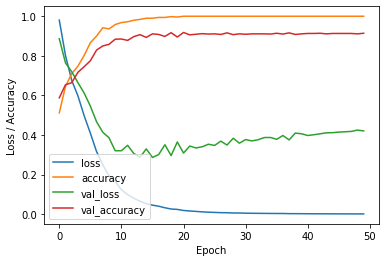

Training  log_loss:   0.0012008768319462177
Training  accuracy:   1.0 



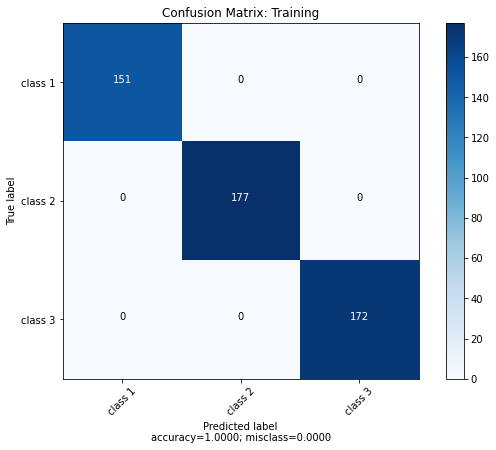

Validation  log_loss:   0.4206671525617702
Validation  accuracy:   0.914 



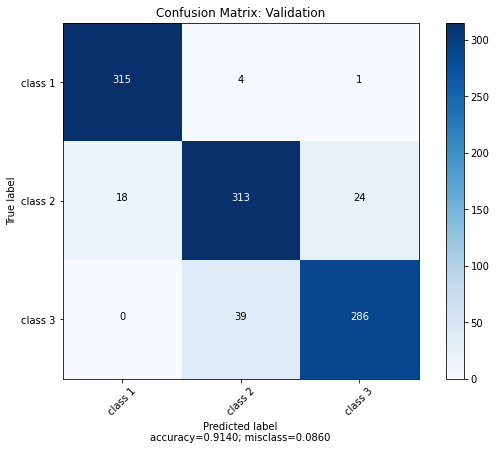

In [130]:
# Load the CRT dataset (Question 4)
x_trn, d_trn, x_val, d_val, width, height = loadImagesCRT()
# Load the R3 dataset (Question 5)
#x_trn, d_trn, x_val, d_val, width, height = loadImagesR3()

print('Training data input shape: ', x_trn.shape)
print('Training data output shape: ', d_trn.shape)
print('Validation data input shape: ', x_val.shape)
print('Validation data output shape: ', d_val.shape)

# The size of the images
input_shape = (width, height, 1)

# Define the CNN ex3
ex3 = Sequential()

#
# YOUR CODE HERE
#
# First conv layer
ex3.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
ex3.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer
ex3.add(Conv2D(3, kernel_size=(2, 2), activation='relu'))
ex3.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected MLP layers
ex3.add(Flatten())
ex3.add(Dense(9, activation='relu'))

# Output layer
ex3.add(Dense(3, activation='softmax'))
#
# YOUR CODE HERE
#

# We use cross entropy error and the adam optimizer
adam = Adam(learning_rate=0.003)
ex3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
ex3.summary()

# Now train the ex3
estimator_ex3 = ex3.fit(x_trn, d_trn, 
                      validation_data=(x_val, d_val),
                      epochs=50, 
                      batch_size=50,
                      verbose=0)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex3.history.keys():
    plt.plot(estimator_ex3.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Training result
multi_stat_3(ex3, x_trn, d_trn, 'Training')

# Validation result
multi_stat_3(ex3, x_val, d_val, 'Validation')